In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# loading dataset
data_df = pd.read_csv("iris.csv")

In [39]:
# initializing setup
from pycaret.clustering import *
clu1 = setup(data_df.iloc[:,1:5], log_experiment = True, experiment_name = 'iris')

Setup Succesfully Completed!


,Description,Value
0,session_id,420
1,Original Data,"(150, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(150, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                                                    target='dummy_target')),
                ('feature_time'

In [40]:
# create kmeans model
kmeans = create_model('kmeans')

,Metric
Silhouette,0.4972
Calinski-Harabasz,529.1207
Davies-Bouldin,0.7760


INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=420, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


In [41]:
# create kmodes model
kmodes = create_model('kmodes')

,Metric
Silhouette,-0.1673
Calinski-Harabasz,9.8581
Davies-Bouldin,4.6042


INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x00000148FB5C75E8>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=420,
       verbose=0)
INFO:logs:create_models() succesfully completed......................................


In [42]:
# assign labels using trained model
kmeans_df = assign_model(kmeans)

INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................


In [43]:
kmeans_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,Cluster 2
1,4.9,3.0,1.4,0.2,Cluster 2
2,4.7,3.2,1.3,0.2,Cluster 2
3,4.6,3.1,1.5,0.2,Cluster 2
4,5.0,3.6,1.4,0.2,Cluster 2


In [44]:
# percentile list 
perc =[.20, .40, .60, .80] 
 
# list of dtypes to include 
include =['object', 'float', 'int'] 
# calling describe method 
desc = kmeans_df.describe(percentiles = perc, include = include).T
  
# display 
desc 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5,5.6,5.8,6.1,6.52,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.7,3,3,3.1,3.4,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.5,3.9,4.35,4.64,5.32,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.2,1.16,1.3,1.5,1.9,2.5
Cluster,150,4,Cluster 2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# plot a model
plot_model(kmeans) 

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=420, tol=0.0001, verbose=0), plot=cluster, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: cluster
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=420, tol=0.0001, verbose=0), transformation=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting PCA()
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


## Hierarchical Clustering

In [46]:
h_clust = create_model('hclust')

,Metric
Silhouette,0.4887
Calinski-Harabasz,513.7722
Davies-Bouldin,0.7956


INFO:logs:AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)
INFO:logs:create_models() succesfully completed......................................


In [47]:
# assign labels using trained model
hclust_df = assign_model(h_clust)

INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................


In [48]:
# plot a model
plot_model(h_clust)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4), plot=cluster, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: cluster
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4), transformation=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Agglomerative Clustering
INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting PCA()
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [49]:
# plot a model
plot_model(h_clust,'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4), plot=tsne, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4), transformation=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Agglomerative Clustering
INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4), plot=elbow, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: elbow
INFO:logs:Fitting KElbowVisualizer()
INFO:logs:Rendering Visual


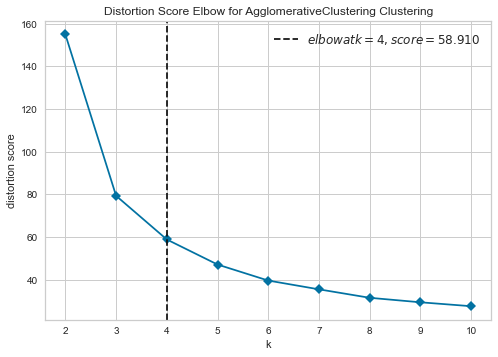

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [50]:
# plot a model
plot_model(h_clust,'elbow')

In [51]:
#tune k-means model with lr i.e. logistic regression
tuned_kmeans = tune_model(model = 'kmeans', supervised_target = 'Species',estimator='lr')

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=kmeans, supervised_target=Species, estimator=lr, optimize=None, custom_grid=None, fold=10, verbose=True)
INFO:logs:Checking exceptions


SystemExit: (Value Error): supervised_target not recognized. It can only be one of the following: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [52]:
# generate predictions
kmeans_tuned_predictions = predict_model(tuned_kmeans, data = data_df)

In [53]:
kmeans_tuned_predictions

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Cluster 0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Cluster 5
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Cluster 5
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Cluster 5
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Cluster 0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Cluster 4
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Cluster 1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Cluster 4
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Cluster 4


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3653, tol=0.0001, verbose=0), plot=elbow, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: elbow
INFO:logs:Fitting KElbowVisualizer()
INFO:logs:Rendering Visual


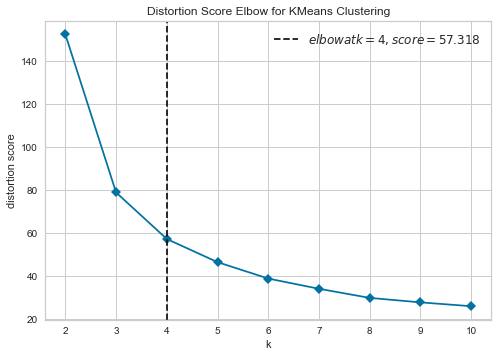

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
# plot a model
plot_model(tuned_kmeans,'elbow')

### 4 clusters detected

In [55]:
# assign labels using trained model
tuned_kmeans_df = assign_model(tuned_kmeans)
tuned_kmeans_df.head()
#plot_model(tuned_kmeans_df)

INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,Cluster 0
1,4.9,3.0,1.4,0.2,Cluster 5
2,4.7,3.2,1.3,0.2,Cluster 5
3,4.6,3.1,1.5,0.2,Cluster 5
4,5.0,3.6,1.4,0.2,Cluster 0


In [60]:
tuned_kmeans_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Cluster,150,8,Cluster 0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
plot_model(tuned_kmeans,'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3653, tol=0.0001, verbose=0), plot=tsne, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3653, tol=0.0001, verbose=0), transformation=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:(150, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
